In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [106]:
df=pd.read_csv("C:/Users/dishi/OneDrive/Desktop/PYTHON DATASETS/social_media.csv")
len(df) # the dataset has 500 entries
df.head(5)

,User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10)
0,U001,44,Male,3.1,7,6,2,5,Facebook,10
1,U002,30,Other,5.1,7,8,5,3,LinkedIn,10
2,U003,23,Other,7.4,6,7,1,3,YouTube,6
3,U004,36,Female,5.7,7,8,1,1,TikTok,8
4,U005,34,Female,7.0,4,7,5,1,X (Twitter),8


In [107]:
# seeing if there are any duplicate users, which would be a discrepancy in the dataset
df['User_ID'].nunique()
print('There are no duplicate User_ID entries')


renames={'Daily_Screen_Time(hrs)':'daily screen time.h',
         'Sleep_Quality(1-10)':'sleep quality',
         'Stress_Level(1-10)':'stress level',
         'Exercise_Frequency(week)':'week days exercised',
         'Social_Media_Platform':'platform',
         'Happiness_Index(1-10)':'happiness index'}

df=df.rename(mapper=renames, axis=1) # renaming column names for easier data handling
df.head(2) 

There are no duplicate User_ID entries


,User_ID,Age,Gender,daily screen time.h,sleep quality,stress level,Days_Without_Social_Media,week days exercised,platform,happiness index
0,U001,44,Male,3.1,7,6,2,5,Facebook,10
1,U002,30,Other,5.1,7,8,5,3,LinkedIn,10


In [108]:
print('Basic Analysis of daily screen time, sleep quality and stress level:')

print(df['daily screen time.h'].describe())
print(df['sleep quality'].describe())
print(df['stress level'].describe())

Basic Analysis of daily screen time, sleep quality and stress level:
count    500.000000
mean       5.530000
std        1.734877
min        1.000000
25%        4.300000
50%        5.600000
75%        6.700000
max       10.800000
Name: daily screen time.h, dtype: float64
count    500.000000
mean       6.304000
std        1.529792
min        2.000000
25%        5.000000
50%        6.000000
75%        7.000000
max       10.000000
Name: sleep quality, dtype: float64
count    500.000000
mean       6.618000
std        1.542996
min        2.000000
25%        6.000000
50%        7.000000
75%        8.000000
max       10.000000
Name: stress level, dtype: float64


The histogram in Plot 1 shows that most users spend around 5 to 7 hours per day on social media, suggesting overuse among the sample population.
Plot 2 shows that users report moderately good sleep quality, averaging about 6 out of 10.
Plot 3 indicates that overall stress levels are elevated, as the majority of users report values ranging from 6 to 8 out of 10.


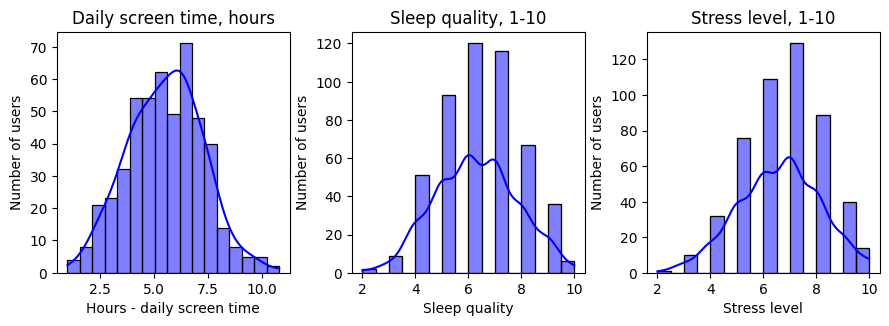

In [109]:
fig, axes=plt.subplots( nrows=1, ncols=3, figsize=(9,3))
plt.tight_layout()

sns.histplot( data=df, x='daily screen time.h', color='blue', kde=True, ax=axes[0])
axes[0].set_title('Daily screen time, hours')
axes[0].set_ylabel('Number of users')
axes[0].set_xlabel('Hours - daily screen time')

sns.histplot(data=df, x='sleep quality', color='blue', kde=True, ax=axes[1])
axes[1].set_ylabel('Number of users')
axes[1].set_title('Sleep quality, 1-10')
axes[1].set_xlabel('Sleep quality')

sns.histplot(data=df, x='stress level', color='blue', kde=True, ax=axes[2])
axes[2].set_ylabel('Number of users')
axes[2].set_title('Stress level, 1-10')
axes[2].set_xlabel('Stress level')

print('The histogram in Plot 1 shows that most users spend around 5 to 7 hours per day on social media, suggesting overuse among the sample population.')
print('Plot 2 shows that users report moderately good sleep quality, averaging about 6 out of 10.')
print('Plot 3 indicates that overall stress levels are elevated, as the majority of users report values ranging from 6 to 8 out of 10.')

The most popular platforms amongst the users are Tik Tok, Twitter and LinkedIn:
platform
TikTok         95
X (Twitter)    88
LinkedIn       87
Name: count, dtype: int64


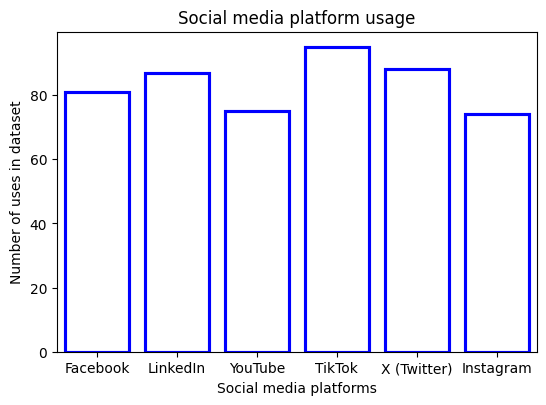

In [110]:
fig=plt.figure( figsize=(6,4))
axis=fig.add_axes( [0.1,0.1,0.8,0.8])
sns.countplot( data=df, x='platform', color='blue', ax=axis, fill=False)
axis.set_xlabel('Social media platforms')
axis.set_ylabel('Number of uses in dataset')
axis.set_title('Social media platform usage')
print('The most popular platforms amongst the users are Tik Tok, Twitter and LinkedIn:')
print(df['platform'].value_counts().head(3))

In [111]:
df.head(2)
freqtable=df.groupby(['Gender','platform']).agg({'User_ID':'count'})
freqtable.reset_index(inplace=True)
freqtable=freqtable.loc[0:11,:] # to have only males and females in the gender column
freqtable.columns=['Gender', 'Platform used', 'N. of users']
freqtable.sort_values(by=['Gender','N. of users'], ascending=[False, False])
print(freqtable)
print('Social media platform popularity ranks simillarly across different gender groups.')

    Gender Platform used  N. of users
0   Female      Facebook           46
1   Female     Instagram           27
2   Female      LinkedIn           44
3   Female        TikTok           44
4   Female   X (Twitter)           36
5   Female       YouTube           32
6     Male      Facebook           34
7     Male     Instagram           44
8     Male      LinkedIn           39
9     Male        TikTok           48
10    Male   X (Twitter)           46
11    Male       YouTube           37
Social media platform popularity ranks simillarly across different gender groups.


Gender
Male      248
Female    229
Other      23
Name: count, dtype: int64
Even though there are more males in the dataset, males tend to spend more time on every platform than females, exept for Facebook and LinkedIn


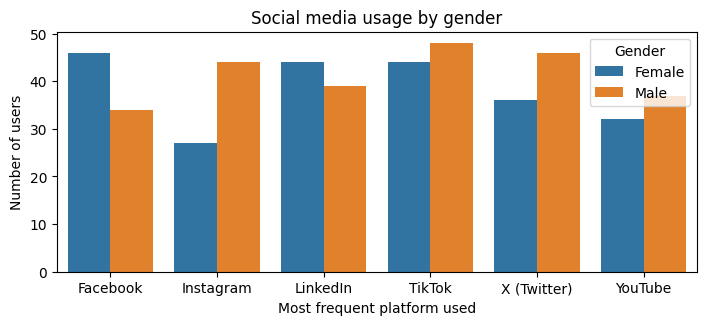

In [112]:
fig=plt.figure( figsize=(8,3))
axes=fig.add_axes( [0.1,0.1,0.8,0.8])
sns.barplot( data=freqtable, x='Platform used', y='N. of users', hue='Gender', ax=axes)
axes.set_xlabel('Most frequent platform used')
axes.set_ylabel('Number of users')
axes.set_title('Social media usage by gender')
print( df['Gender'].value_counts() )

print('Even though there are more males in the dataset, males tend to spend more time on every platform than females, exept for Facebook and LinkedIn')

In [113]:
df.head()

,User_ID,Age,Gender,daily screen time.h,sleep quality,stress level,Days_Without_Social_Media,week days exercised,platform,happiness index
0,U001,44,Male,3.1,7,6,2,5,Facebook,10
1,U002,30,Other,5.1,7,8,5,3,LinkedIn,10
2,U003,23,Other,7.4,6,7,1,3,YouTube,6
3,U004,36,Female,5.7,7,8,1,1,TikTok,8
4,U005,34,Female,7.0,4,7,5,1,X (Twitter),8


In [114]:
numeric_cols=df.loc[:,['Age','daily screen time.h','sleep quality','stress level','Days_Without_Social_Media',
                        'week days exercised','happiness index']]
numeric_cols.head() # selecting only the numeric columns from dataset

corr=numeric_cols.corr()
print('Age is not correlated with any of the variables, while sleep quality is negatively correlated with daily sceen time use')
corr # the correlation matrix between the numeric columns of the dataset

Age is not correlated with any of the variables, while sleep quality is negatively correlated with daily sceen time use


,Age,daily screen time.h,sleep quality,stress level,Days_Without_Social_Media,week days exercised,happiness index
Age,1.000000,0.023505,-0.053813,0.016522,-0.025783,0.064059,0.018513
daily screen time.h,0.023505,1.000000,-0.758910,0.739891,-0.045310,-0.099023,-0.705206
sleep quality,-0.053813,-0.758910,1.000000,-0.584899,0.040617,0.027431,0.678829
stress level,0.016522,0.739891,-0.584899,1.000000,-0.007970,-0.018582,-0.737213
Days_Without_Social_Media,-0.025783,-0.045310,0.040617,-0.007970,1.000000,-0.000012,0.063525
week days exercised,0.064059,-0.099023,0.027431,-0.018582,-0.000012,1.000000,0.041224
happiness index,0.018513,-0.705206,0.678829,-0.737213,0.063525,0.041224,1.000000


<Axes: >

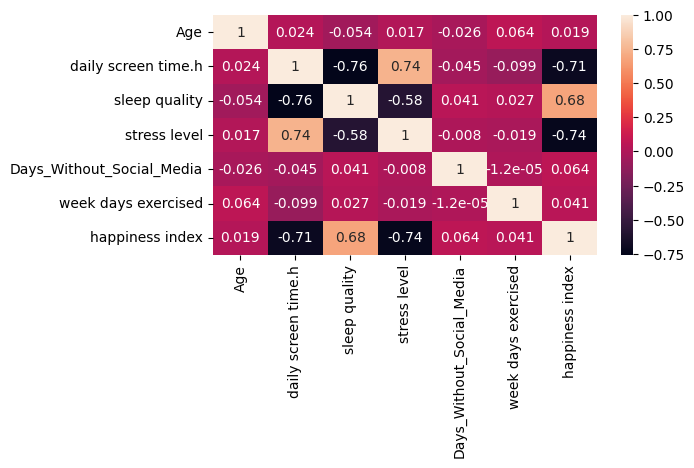

In [115]:
fig=plt.figure( figsize=(6,3))
axes=fig.add_axes( [0.1,0.1,0.8,0.8])
sns.heatmap( corr, annot=True, ax=axes)

In [116]:
df.head(2)
gr1=df.groupby('Gender').agg({'happiness index':'mean'})
gr1.reset_index(inplace=True)

renames={'Gender':'Gender','happiness index':'Average happiness index'}
gr1.rename( mapper=renames, axis=1, inplace=True)
gr1['Average happiness index']=gr1['Average happiness index'].round(decimals=2)
print(gr1)
print('The mean happiness index varies very little between males and females; females surpass males by 0.02 points only')
print('Users that did not state their gender in the questionnaire report the highest happiness index of 8.78')

   Gender  Average happiness index
0  Female                     8.37
1    Male                     8.35
2   Other                     8.78
The mean happiness index varies very little between males and females; females surpass males by 0.02 points only
Users that did not state their gender in the questionnaire report the highest happiness index of 8.78


In [117]:
df['daily screen time.h'].describe()

count    500.000000
mean       5.530000
std        1.734877
min        1.000000
25%        4.300000
50%        5.600000
75%        6.700000
max       10.800000
Name: daily screen time.h, dtype: float64

In [118]:
df.head(2)

# custom function that will loop over the rows of of the dataset to categorize screen time
def screentime( row):
    if row['daily screen time.h'] < 3.00:
        output='Low'
    elif (row['daily screen time.h'] >= 3.00) and (row['daily screen time.h'] < 6.00):
        output='Medium'
    elif (row['daily screen time.h'] >= 6.00) and (row['daily screen time.h'] < 8.00):
        output='High'
    else:
        output='Very high'
    return output 

df['Screen time category']=df.apply( screentime, axis=1) # applying the custom function through the rows
df.head(3)

,User_ID,Age,Gender,daily screen time.h,sleep quality,stress level,Days_Without_Social_Media,week days exercised,platform,happiness index,Screen time category
0,U001,44,Male,3.1,7,6,2,5,Facebook,10,Medium
1,U002,30,Other,5.1,7,8,5,3,LinkedIn,10,Medium
2,U003,23,Other,7.4,6,7,1,3,YouTube,6,High


In [119]:
print('Analysing average sleep quality by screen time category:')
gr2=df.groupby('Screen time category').agg({'sleep quality':'mean'})

# custom function to round 
def rounding(dataset):
    for col in dataset.columns:
        if dataset[col].dtype=='float64':
            dataset[col]=dataset[col].round(decimals=2)
    return dataset

gr2.reset_index(inplace=True)
gr2=rounding(gr2)
gr2.columns=['Screen time category','Average sleep quality']
gr2.sort_values( by='Average sleep quality', ascending=True, inplace=True)
print(gr2)
print('According to the data, sleep quality is directly and negatively affected by excessive social media usage')

Analysing average sleep quality by screen time category:
  Screen time category  Average sleep quality
3            Very high                   4.18
0                 High                   5.43
2               Medium                   6.91
1                  Low                   8.43
According to the data, sleep quality is directly and negatively affected by excessive social media usage


Text(0.5, 1.0, 'Sleep quality and Screen time')

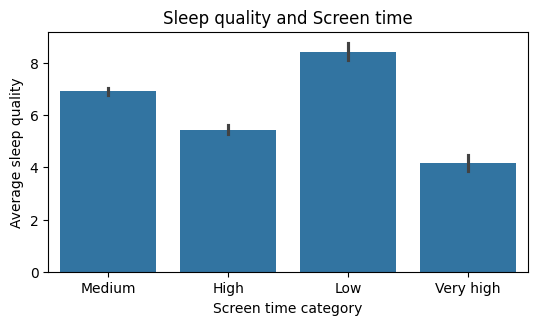

In [120]:
fig=plt.figure( figsize=(6,3))
axes=fig.add_axes( [0.1,0.1,0.8,0.8])
sns.barplot( data=df, x='Screen time category', y='sleep quality', estimator='mean', ax=axes)
axes.set_ylabel('Average sleep quality')
axes.set_title('Sleep quality and Screen time')

In [122]:
# new feature for stress category
def stresscategory(row):
    if row['stress level'] <= 3:
        output='low stress'
    elif (row['stress level'] > 3) and (row['stress level'] <= 6):
        output='medium stress'
    elif (row['stress level'] > 6) and (row['stress level'] <= 8):
        output='high stress'
    else:
        output='very high stress'
    return output

df['Stress category']=df.apply( stresscategory, axis=1)
df['Stress category']=df['Stress category'].str.title()
df.head(2)

,User_ID,Age,Gender,daily screen time.h,sleep quality,stress level,Days_Without_Social_Media,week days exercised,platform,happiness index,Screen time category,Stress category
0,U001,44,Male,3.1,7,6,2,5,Facebook,10,Medium,Medium Stress
1,U002,30,Other,5.1,7,8,5,3,LinkedIn,10,Medium,High Stress


In [132]:
print('Which platform usage results in higher stress levels across the population?')

def stress_platform(dataset, v1, v2, **kwargs):
    normalize=kwargs.get('normalize', False)
    if normalize:
        return dataset.value_counts(normalize=True).get(v1,0) + dataset.value_counts(normalize=True).get(v2,0)
    else:
        return dataset.value_counts().get(v1,0) + dataset.value_counts().get(v2,0)

gr4=pd.DataFrame( df.groupby('platform')['Stress category'].apply( stress_platform, 'High stress','Very High Stress', normalize=True) )
gr4.reset_index(inplace=True)
gr4.columns=['Platform','% of very stressed users']
gr4['% of very stressed users']=gr4['% of very stressed users']*100
gr4.sort_values( by='% of very stressed users', ascending=False, inplace=True)
print(gr4)
print('Evidence shows that Instagram and Youtube are the platforms that are most popular across the most stressed users.')

Which platform usage results in higher stress levels across the population?
      Platform  % of very stressed users
1    Instagram                 17.567568
5      YouTube                 12.000000
3       TikTok                 11.578947
4  X (Twitter)                 10.227273
0     Facebook                  8.641975
2     LinkedIn                  5.747126
Evidence shows that Instagram and Youtube are the platforms that are most popular across the most stressed users.


In [143]:
df=df [ (df['Gender'] =='Male') | (df['Gender']=='Female')]
len(df) # elimination of rows with "other" as gender category

477

In [148]:
df.head(2)

gr5=df.groupby(['Gender','platform']).agg({'happiness index':['mean','var']})
gr5.reset_index(inplace=True)
gr5.columns=['Gender','Platform','Mean HI','Variance of HI']
gr5=rounding(gr5)
gr5.sort_values( by=['Gender','Mean HI'], ascending=[True, False], inplace=True)
print(gr5)
print('It is safe to conclude that the use of Instagram results in the lowest overall happiness')
print('Hapiness index data varies most for the use of Youtube, with the variance being higher for females')

    Gender     Platform  Mean HI  Variance of HI
4   Female  X (Twitter)     8.67            2.00
2   Female     LinkedIn     8.55            2.07
5   Female      YouTube     8.38            3.47
3   Female       TikTok     8.32            2.97
0   Female     Facebook     8.17            2.55
1   Female    Instagram     8.07            2.61
6     Male     Facebook     8.56            1.71
10    Male  X (Twitter)     8.54            2.08
9     Male       TikTok     8.48            2.34
8     Male     LinkedIn     8.44            1.57
11    Male      YouTube     8.16            2.47
7     Male    Instagram     7.91            2.55
It is safe to conclude that the use of Instagram results in the lowest overall happiness
Hapiness index data varies most for the use of Youtube, with the variance being higher for females


In [170]:
df.head(2)

gr6=df.groupby('stress level').agg({'sleep quality':'mean',
                                    'week days exercised':'mean',
                                    'happiness index':'mean',
                                   'Days_Without_Social_Media':'mean'})
gr6=rounding(gr6)
gr6.reset_index(inplace=True)
gr6.head(2)

,stress level,sleep quality,week days exercised,happiness index,Days_Without_Social_Media
0,2,7.00,0.00,10.0,1.00
1,3,8.11,2.78,10.0,2.11


Text(28.972222222222214, 0.5, 'Days without social media')

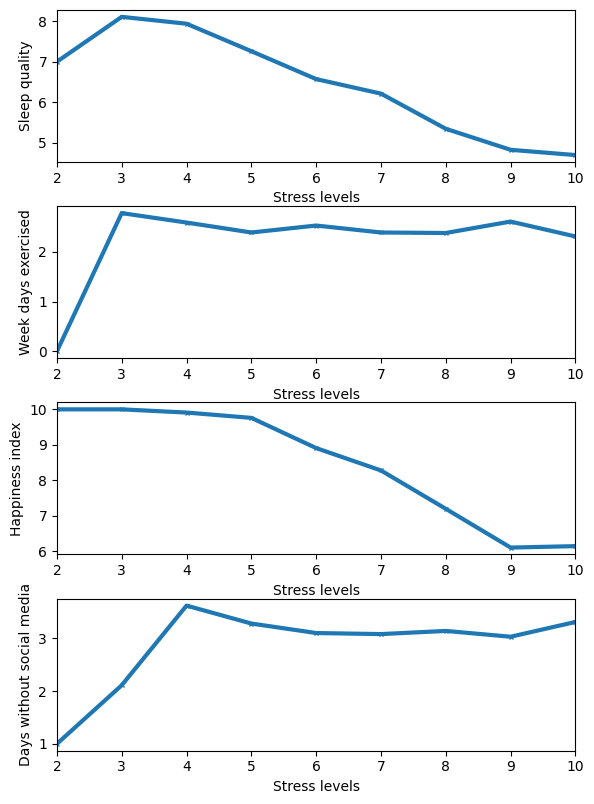

In [171]:
fig, ax=plt.subplots( nrows=4, ncols=1, figsize=(6,8))
plt.tight_layout()

ax[0].plot( gr6['stress level'], gr6['sleep quality'], lw=3, marker='x', markersize=3)
ax[0].set_xlim([2,10])
ax[0].set_xlabel('Stress levels')
ax[0].set_ylabel('Sleep quality')

ax[1].plot( gr6['stress level'], gr6['week days exercised'], lw=3, marker='x', markersize=3)
ax[1].set_xlim([2,10])
ax[1].set_xlabel('Stress levels')
ax[1].set_ylabel('Week days exercised')

ax[2].plot( gr6['stress level'], gr6['happiness index'], lw=3, marker='x', markersize=3)
ax[2].set_xlim([2,10])
ax[2].set_xlabel('Stress levels')
ax[2].set_ylabel('Happiness index')

ax[3].plot( gr6['stress level'], gr6['Days_Without_Social_Media'], lw=3, marker='x', markersize=3)
ax[3].set_xlim([2,10])
ax[3].set_xlabel('Stress levels')
ax[3].set_ylabel('Days without social media')

In [172]:
gr6.head(3)

,stress level,sleep quality,week days exercised,happiness index,Days_Without_Social_Media
0,2,7.00,0.00,10.00,1.00
1,3,8.11,2.78,10.00,2.11
2,4,7.94,2.59,9.91,3.62


In [175]:
melted=pd.melt( frame=gr6, var_name='Variables', value_name='Values', id_vars='stress level')
melted.head(2) # melting the data frame to plot

,stress level,Variables,Values
0,2,sleep quality,7.00
1,3,sleep quality,8.11


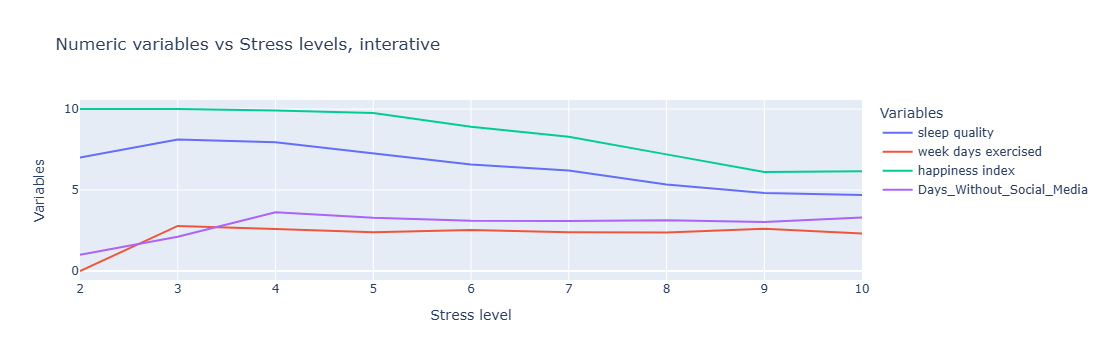

In [178]:
fig1=px.line( melted, color='Variables', x='stress level', y='Values', hover_name='Variables',
            labels={'stress level':'Stress level', 'Values':'Variables'}, title='Numeric variables vs Stress levels, interative')
fig1.show()